Prompt (GPT 4o)

Write a Python script to import essential libraries such as pandas for data manipulation, seaborn, matplotlib.pyplot, and plotly.express for data visualization, and Scikit-learn modules for machine learning tasks such as data preprocessing, model training, and evaluation. 

Code

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Prompt (GPT 4o)

Load a dataset named card_transdata.csv using pandas.read_csv() and store it in a variable called transaction_data_raw. Display the first few rows, shape, info, and describe the dataset using built in pandas function

In [2]:
# Load the dataset
transaction_data_raw = pd.read_csv('card_transdata.csv')

# Display basic information about the dataset
print("First few rows of the dataset:")
print(transaction_data_raw.head())

print("\nShape of the dataset:", transaction_data_raw.shape)

print("\nGeneral information about the dataset:")
transaction_data_raw.info()

print("\nDescriptive statistics of the dataset:")
print(transaction_data_raw.describe())

First few rows of the dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0       

Prompt (GPT 4o)

check for missing values in the dataset 


In [3]:

# Check for missing values
print("\nMissing values in the dataset:")
print(transaction_data_raw.isnull().sum())


Missing values in the dataset:
distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


Prompt (GPT 4o)

write a python script to drop null values from the dataset. make a copy of a dataset into a variable called transation_data_cleaned. Then print the shape of the the cleaned dataset. Finally display first few rows of cleaned data.



In [4]:

# Drop rows with missing values and make a copy
transaction_data_cleaned = transaction_data_raw.dropna()

# Print the shape of the cleaned dataset
print("\nShape of the cleaned dataset:", transaction_data_cleaned.shape)

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(transaction_data_cleaned.head())


Shape of the cleaned dataset: (977, 8)

First few rows of the cleaned dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   
5                        0.064768              1.0        0.0   
6                        0.278465              1.0        0.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  
5              0.0

Prompt (GPT 4o)

Use already imported seaborn library and matplotlib library to create visualizations that explore the distribution of key features. Generate count plots for categorical variables such as fraud, used_pin_number, repeat_retailer, and used_chip. Create histograms for numerical features like distance_from_last_transaction and ratio_to_median_purchase_price to understand their distributions.

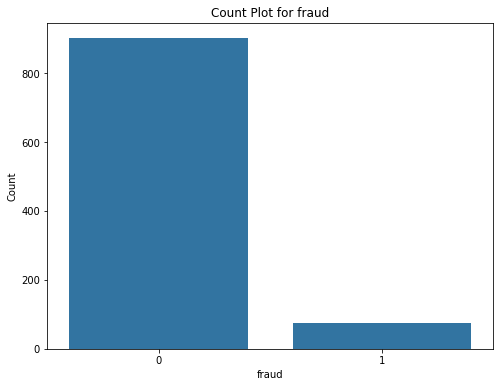

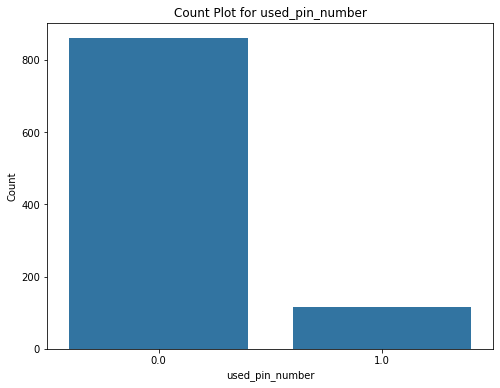

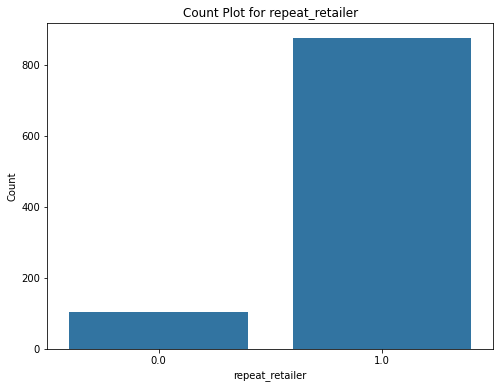

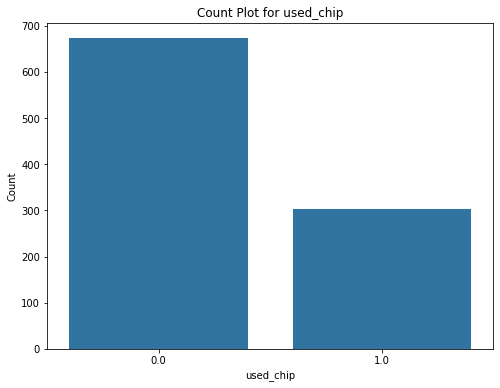

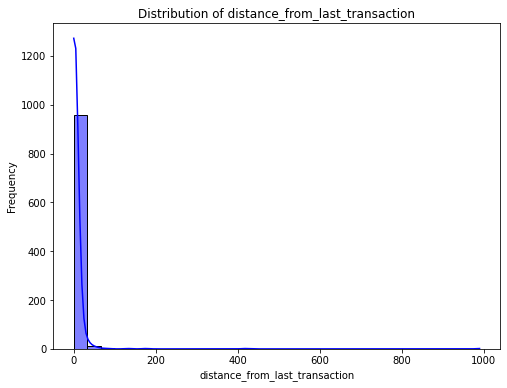

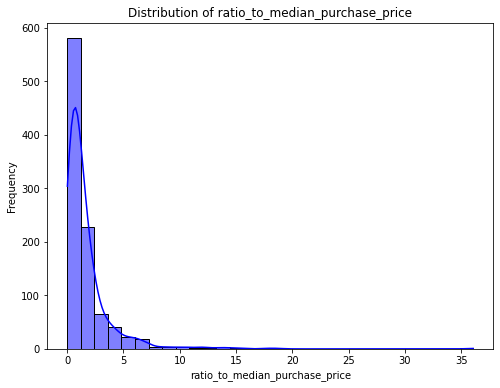

In [5]:
# Assuming `transaction_data_cleaned` is already loaded and cleaned

# Categorical variables
categorical_vars = ['fraud', 'used_pin_number', 'repeat_retailer', 'used_chip']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=transaction_data_cleaned)
    plt.title(f'Count Plot for {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

# Numerical variables
numerical_vars = ['distance_from_last_transaction', 'ratio_to_median_purchase_price']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(transaction_data_cleaned[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


Prompt (GPT 4o)

Visualize the distribution of 'distance_from_home referring the previous above and make a histogram for hthedistance_from_home column

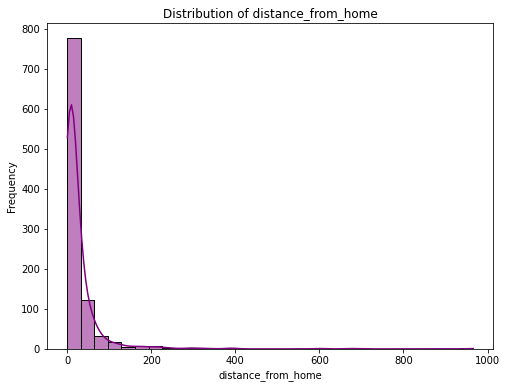

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `transaction_data_cleaned` is already loaded and cleaned

plt.figure(figsize=(8, 6))
sns.histplot(transaction_data_cleaned['distance_from_home'], kde=True, bins=30, color='purple')
plt.title('Distribution of distance_from_home')
plt.xlabel('distance_from_home')
plt.ylabel('Frequency')
plt.show()


Prompt (GPT 4o)

using Seaborn, create a count plot for the used_pin_number column from the transaction_data_cleaned dataset, comparing transactions marked as fraudulent or non-fraudulent. Use different colors for the categories in the fraud column, such as green for non-fraudulent and red for fraudulent. Add a title, axis labels, and a legend with descriptive labels.


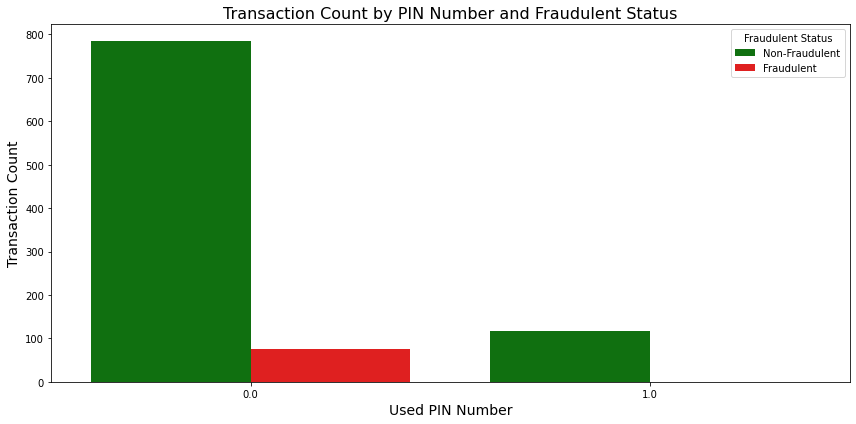

In [7]:
# Assuming transaction_data_cleaned is already loaded as a DataFrame
# Replace this with the actual DataFrame loading code if necessary
# For example:
# transaction_data_cleaned = pd.read_csv("path_to_dataset.csv")

# Plot setup
plt.figure(figsize=(12, 6))

# Creating the count plot
sns.countplot(
    data=transaction_data_cleaned,
    x='used_pin_number',
    hue='fraud',
    palette={0: 'green', 1: 'red'}  # 0 for non-fraudulent, 1 for fraudulent
)

# Adding title and labels
plt.title("Transaction Count by PIN Number and Fraudulent Status", fontsize=16)
plt.xlabel("Used PIN Number", fontsize=14)
plt.ylabel("Transaction Count", fontsize=14)

# Adding legend with descriptive labels
plt.legend(title="Fraudulent Status", labels=["Non-Fraudulent", "Fraudulent"], loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()


Prompt (GPT 4o)

visualize the percentage of fraudulent and non-fraudulent transactions based on whether a PIN was used or not. Use the transaction_data_cleaned dataset to calculate percentages into a scale from 1 to 100 by grouping by the used_pin_number column and normalizing the fraud values. Create a stacked bar plot to display these percentages, with green representing non-fraudulent transactions and red representing fraudulent ones. Include a title, axis labels, and a legend with descriptive labels.


<Figure size 864x432 with 0 Axes>

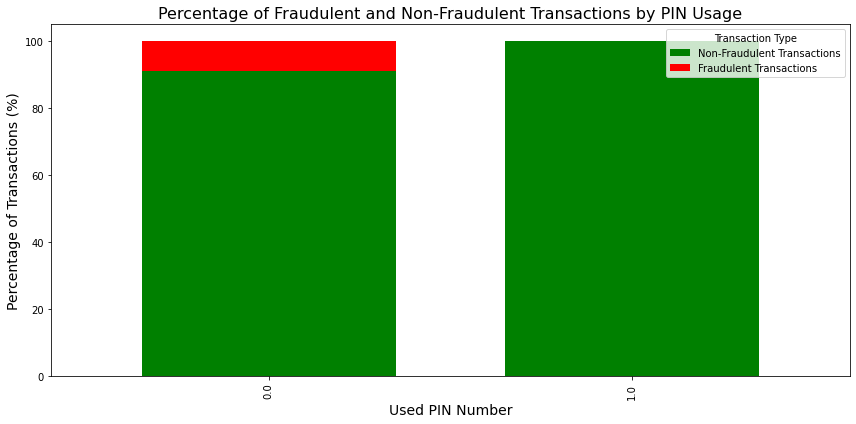

In [8]:
# Assuming transaction_data_cleaned is already loaded as a DataFrame
# Replace this with the actual DataFrame loading code if necessary
# For example:
# transaction_data_cleaned = pd.read_csv("path_to_dataset.csv")

# Calculate percentages scaled from 1 to 100
def calculate_fraud_percentage(df):
    percentage_data = (
        df.groupby('used_pin_number')['fraud']
        .value_counts(normalize=True)
        .rename('percentage')
        .reset_index()
    )
    percentage_data['percentage'] *= 100  # Scale to 1-100
    return percentage_data

percentage_data = calculate_fraud_percentage(transaction_data_cleaned)

# Pivot data for stacked bar plot
pivot_data = percentage_data.pivot(index='used_pin_number', columns='fraud', values='percentage').fillna(0)

# Plot setup
plt.figure(figsize=(12, 6))

# Creating the stacked bar plot
pivot_data.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(12, 6),
    width=0.7
)

# Adding title and labels
plt.title("Percentage of Fraudulent and Non-Fraudulent Transactions by PIN Usage", fontsize=16)
plt.xlabel("Used PIN Number", fontsize=14)
plt.ylabel("Percentage of Transactions (%)", fontsize=14)

# Adding legend with descriptive labels
plt.legend(["Non-Fraudulent Transactions", "Fraudulent Transactions"], title="Transaction Type", loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()


Prompt (GPT 4o)

Analyze the relationship between repeat retailers and fraudulent transactions using the transaction_data_cleaned dataset. First, create a Seaborn count plot showing the number of transactions by repeat_retailer, categorized by fraud status, with green for non-fraudulent and red for fraudulent, including a title, axis labels, and a legend. Then, calculate percentages of fraudulent and non-fraudulent transactions grouped by repeat_retailer using normalized value counts, and plot a stacked bar chart with green and red bars, adding a title, axis labels, and a legend.

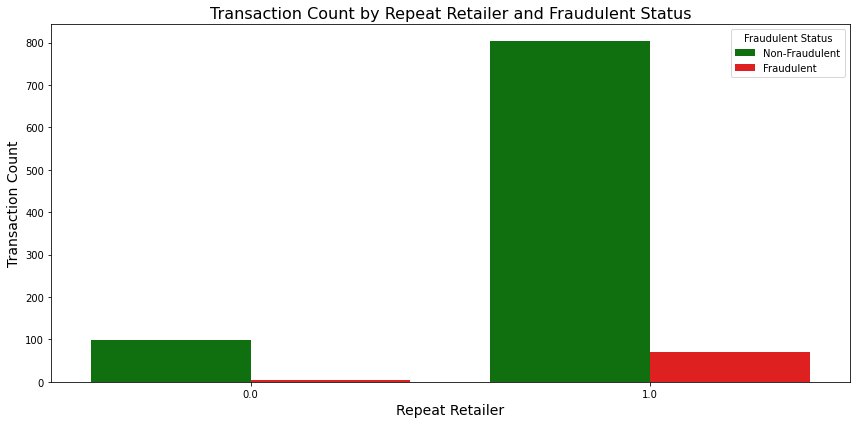

<Figure size 864x432 with 0 Axes>

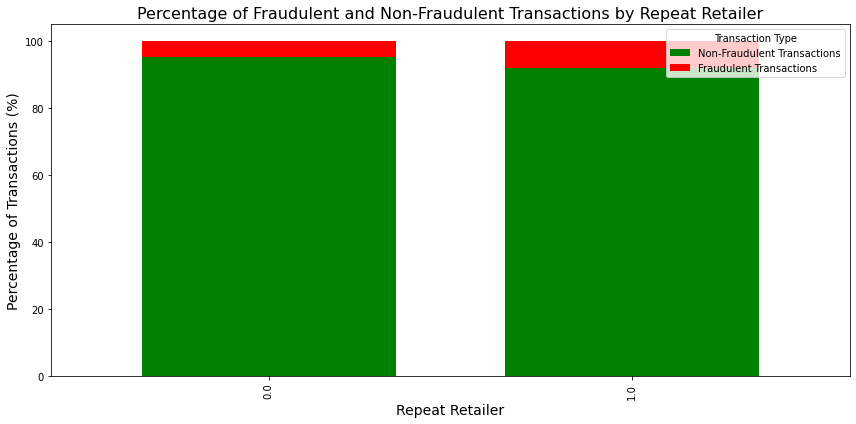

In [9]:
# Assuming transaction_data_cleaned is already loaded as a DataFrame
# Replace this with the actual DataFrame loading code if necessary
# For example:
# transaction_data_cleaned = pd.read_csv("path_to_dataset.csv")

# Plot 1: Count plot by repeat_retailer categorized by fraud status
plt.figure(figsize=(12, 6))
sns.countplot(
    data=transaction_data_cleaned,
    x='repeat_retailer',
    hue='fraud',
    palette={0: 'green', 1: 'red'}
)
plt.title("Transaction Count by Repeat Retailer and Fraudulent Status", fontsize=16)
plt.xlabel("Repeat Retailer", fontsize=14)
plt.ylabel("Transaction Count", fontsize=14)
plt.legend(title="Fraudulent Status", labels=["Non-Fraudulent", "Fraudulent"], loc="upper right")
plt.tight_layout()
plt.show()

# Calculate percentages scaled from 1 to 100 for repeat_retailer
def calculate_repeat_retailer_fraud_percentage(df):
    percentage_data = (
        df.groupby('repeat_retailer')['fraud']
        .value_counts(normalize=True)
        .rename('percentage')
        .reset_index()
    )
    percentage_data['percentage'] *= 100  # Scale to 1-100
    return percentage_data

repeat_retailer_percentage_data = calculate_repeat_retailer_fraud_percentage(transaction_data_cleaned)

# Pivot data for stacked bar plot
repeat_retailer_pivot_data = repeat_retailer_percentage_data.pivot(index='repeat_retailer', columns='fraud', values='percentage').fillna(0)

# Plot 2: Stacked bar chart for repeat_retailer percentages
plt.figure(figsize=(12, 6))
repeat_retailer_pivot_data.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(12, 6),
    width=0.7
)
plt.title("Percentage of Fraudulent and Non-Fraudulent Transactions by Repeat Retailer", fontsize=16)
plt.xlabel("Repeat Retailer", fontsize=14)
plt.ylabel("Percentage of Transactions (%)", fontsize=14)
plt.legend(["Non-Fraudulent Transactions", "Fraudulent Transactions"], title="Transaction Type", loc="upper right")
plt.tight_layout()
plt.show()


Prompt (GPT 4o)

Visualize the relationship between chip usage and fraudulent transactions using the transaction_data_cleaned dataset. Create a Seaborn count plot showing the number of transactions categorized by used_chip and fraud status, using green for non-fraudulent and red for fraudulent, with appropriate titles, axis labels, and a legend. Then, calculate the percentage of fraudulent and non-fraudulent transactions grouped by used_chip using normalized value counts, and create a stacked bar chart with green and red bars, including titles, axis labels, and a legend.

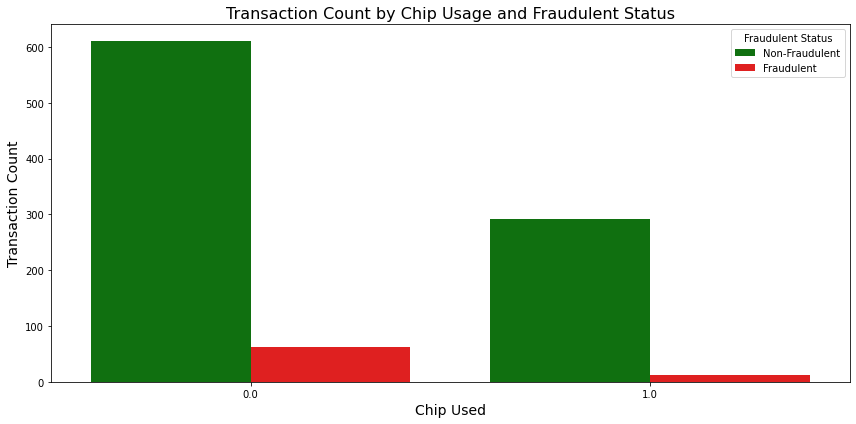

<Figure size 864x432 with 0 Axes>

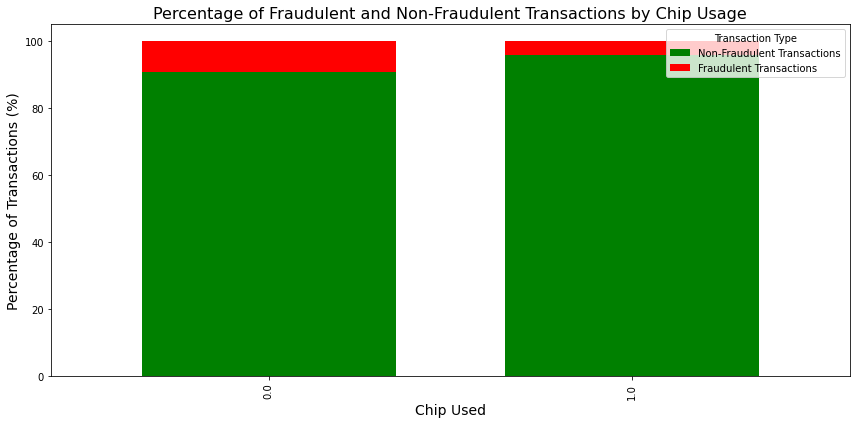

In [10]:
# Assuming transaction_data_cleaned is already loaded as a DataFrame
# Replace this with the actual DataFrame loading code if necessary
# For example:
# transaction_data_cleaned = pd.read_csv("path_to_dataset.csv")

# Plot 1: Count plot by used_chip categorized by fraud status
plt.figure(figsize=(12, 6))
sns.countplot(
    data=transaction_data_cleaned,
    x='used_chip',
    hue='fraud',
    palette={0: 'green', 1: 'red'}
)
plt.title("Transaction Count by Chip Usage and Fraudulent Status", fontsize=16)
plt.xlabel("Chip Used", fontsize=14)
plt.ylabel("Transaction Count", fontsize=14)
plt.legend(title="Fraudulent Status", labels=["Non-Fraudulent", "Fraudulent"], loc="upper right")
plt.tight_layout()
plt.show()

# Calculate percentages scaled from 1 to 100 for used_chip
def calculate_used_chip_fraud_percentage(df):
    percentage_data = (
        df.groupby('used_chip')['fraud']
        .value_counts(normalize=True)
        .rename('percentage')
        .reset_index()
    )
    percentage_data['percentage'] *= 100  # Scale to 1-100
    return percentage_data

used_chip_percentage_data = calculate_used_chip_fraud_percentage(transaction_data_cleaned)

# Pivot data for stacked bar plot
used_chip_pivot_data = used_chip_percentage_data.pivot(index='used_chip', columns='fraud', values='percentage').fillna(0)

# Plot 2: Stacked bar chart for used_chip percentages
plt.figure(figsize=(12, 6))
used_chip_pivot_data.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(12, 6),
    width=0.7
)
plt.title("Percentage of Fraudulent and Non-Fraudulent Transactions by Chip Usage", fontsize=16)
plt.xlabel("Chip Used", fontsize=14)
plt.ylabel("Percentage of Transactions (%)", fontsize=14)
plt.legend(["Non-Fraudulent Transactions", "Fraudulent Transactions"], title="Transaction Type", loc="upper right")
plt.tight_layout()
plt.show()


Prompt (GPT 4o)

create a Seaborn count plot that show the number of transactions that were fradulent vs non-fradulent depending on whether it was an online order or not. Make the figure size of (5,3) with title of the plot as Transactions with Online Order vs Fraudulent Transactions. 
Also, create a seaborn plot that shows percentage of fradulent transactions when it was an online order or not. use bar plot the visualize the plot and use green and red for the colors. Make the figure size (5,3). 

<Figure size 720x432 with 0 Axes>

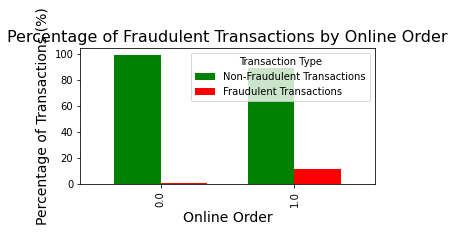

In [11]:

# Calculate percentages scaled from 1 to 100 for online_order
def calculate_online_order_fraud_percentage(df):
    percentage_data = (
        df.groupby('online_order')['fraud']
        .value_counts(normalize=True)
        .rename('percentage')
        .reset_index()
    )
    percentage_data['percentage'] *= 100  # Scale to 1-100
    return percentage_data

online_order_percentage_data = calculate_online_order_fraud_percentage(transaction_data_cleaned)

# Pivot data for percentage bar plot
online_order_pivot_data = online_order_percentage_data.pivot(index='online_order', columns='fraud', values='percentage').fillna(0)

# Plot 3: Bar plot for online_order percentages
plt.figure(figsize=(10, 6))
online_order_pivot_data.plot(
    kind='bar',
    stacked=False,
    color=['green', 'red'],
    figsize=(5, 3),
    width=0.7
)
plt.title("Percentage of Fraudulent Transactions by Online Order", fontsize=16)
plt.xlabel("Online Order", fontsize=14)
plt.ylabel("Percentage of Transactions (%)", fontsize=14)
plt.legend(["Non-Fraudulent Transactions", "Fraudulent Transactions"], title="Transaction Type", loc="upper right")
plt.tight_layout()
plt.show()


Prompt (GPT 4o)

Create a Seaborn scatter plot to identify fradulent and non-fradulent transactions. Use figure size of (10,6). create a hue of fraud column with red when it's fraud and green when it's not. ensure no both of fraud and non-fraud values are showing in green on the legend.

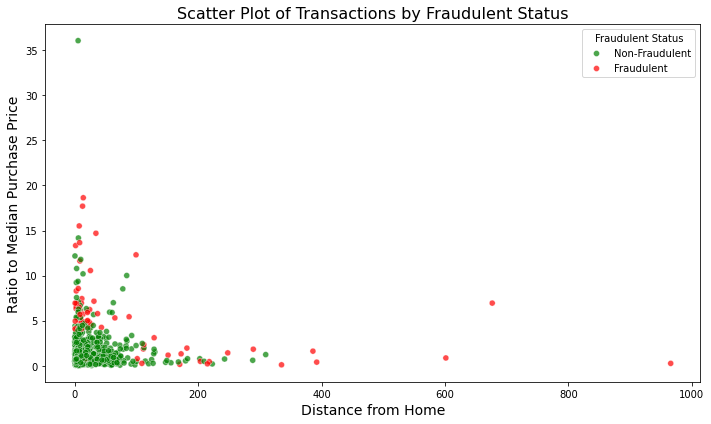

In [17]:
# Scatter plot for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=transaction_data_cleaned,
    x='distance_from_home',  # Feature for x-axis
    y='ratio_to_median_purchase_price',  # Feature for y-axis
    hue='fraud',
    palette={0: 'green', 1: 'red'},  # Green for non-fraudulent, red for fraudulent
    alpha=0.7
)

# Update the legend to correctly reflect the fraud categories
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Non-Fraudulent", "Fraudulent"], title="Fraudulent Status", loc="upper right")

plt.title("Scatter Plot of Transactions by Fraudulent Status", fontsize=16)
plt.xlabel("Distance from Home", fontsize=14)
plt.ylabel("Ratio to Median Purchase Price", fontsize=14)
plt.tight_layout()
plt.show()


Prompt (GPT 4o)

create a scatter plot to distinguish the breakdown of fradulent and non-fraudlent transactions for distance_from_last_transaction vs ratio_to_median_purchase rpice. use green for non-fraudulent and use red for fraudulent. ensure no both of fraud and non-fraud values are showing in green on the legend.


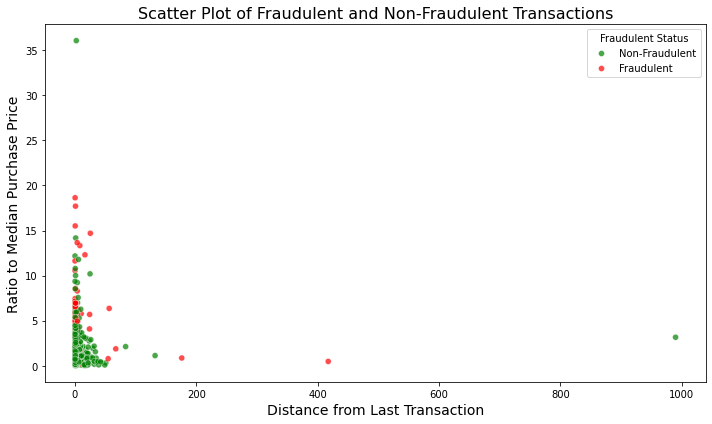

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming transaction_data_cleaned is already loaded as a DataFrame
# Replace this with the actual DataFrame loading code if necessary
# For example:
# transaction_data_cleaned = pd.read_csv("path_to_dataset.csv")

# Scatter plot for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=transaction_data_cleaned,
    x='distance_from_last_transaction',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette={0: 'green', 1: 'red'},  # Ensure correct mapping for fraud values
    alpha=0.7
)

# Update the legend to correctly reflect the fraud categories
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Non-Fraudulent", "Fraudulent"], title="Fraudulent Status", loc="upper right")

# Add title and axis labels
plt.title("Scatter Plot of Fraudulent and Non-Fraudulent Transactions", fontsize=16)
plt.xlabel("Distance from Last Transaction", fontsize=14)
plt.ylabel("Ratio to Median Purchase Price", fontsize=14)
plt.tight_layout()
plt.show()
